In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('data.csv')
df

,Burden,Spacing,UCS,Bench Height,Hole Diameter,Initial Stemming Height,Final Stemming Height,Charge Length,Charge Hole,Powder Factor,MEAN FRAGMENT SIZES
0,3.8,3.8,168.3,6,115,2.8,2.4,4.2,50,0.58,33.77
1,3.8,3.8,168.3,9,115,3.0,2.6,7.0,84,0.54,38.91
2,3.5,3.5,168.3,9,115,3.5,3.1,6.5,78,0.80,28.36
3,3.8,3.8,168.3,9,115,3.0,2.6,7.0,84,0.82,27.95
4,3.8,3.8,288.7,9,115,3.0,2.6,7.0,84,0.52,40.27
...,...,...,...,...,...,...,...,...,...,...,...
495,3.8,3.8,168.3,3,115,2.3,1.9,1.7,20,0.54,30.60
496,3.8,3.8,288.7,9,115,3.0,2.6,7.0,84,0.65,33.86
497,3.8,3.8,168.3,3,115,2.3,1.9,1.7,20,0.57,29.48
498,3.8,3.8,168.3,3,115,2.3,1.9,1.7,20,0.55,30.41


In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df


,burden,spacing,ucs,bench_height,hole_diameter,initial_stemming_height_,final_stemming_height,charge_length,charge_hole_,powder_factor,mean_fragment_sizes
0,3.8,3.8,168.3,6,115,2.8,2.4,4.2,50,0.58,33.77
1,3.8,3.8,168.3,9,115,3.0,2.6,7.0,84,0.54,38.91
2,3.5,3.5,168.3,9,115,3.5,3.1,6.5,78,0.80,28.36
3,3.8,3.8,168.3,9,115,3.0,2.6,7.0,84,0.82,27.95
4,3.8,3.8,288.7,9,115,3.0,2.6,7.0,84,0.52,40.27
...,...,...,...,...,...,...,...,...,...,...,...
495,3.8,3.8,168.3,3,115,2.3,1.9,1.7,20,0.54,30.60
496,3.8,3.8,288.7,9,115,3.0,2.6,7.0,84,0.65,33.86
497,3.8,3.8,168.3,3,115,2.3,1.9,1.7,20,0.57,29.48
498,3.8,3.8,168.3,3,115,2.3,1.9,1.7,20,0.55,30.41


In [4]:
df.isnull().any()

burden                      False
spacing                     False
ucs                         False
bench_height                False
hole_diameter               False
initial_stemming_height_    False
final_stemming_height       False
charge_length               False
charge_hole_                False
powder_factor               False
mean_fragment_sizes         False
dtype: bool

In [5]:
df.duplicated().sum()

16

In [6]:
df.drop_duplicates()

,burden,spacing,ucs,bench_height,hole_diameter,initial_stemming_height_,final_stemming_height,charge_length,charge_hole_,powder_factor,mean_fragment_sizes
0,3.8,3.8,168.3,6,115,2.8,2.4,4.2,50,0.58,33.77
1,3.8,3.8,168.3,9,115,3.0,2.6,7.0,84,0.54,38.91
2,3.5,3.5,168.3,9,115,3.5,3.1,6.5,78,0.80,28.36
3,3.8,3.8,168.3,9,115,3.0,2.6,7.0,84,0.82,27.95
4,3.8,3.8,288.7,9,115,3.0,2.6,7.0,84,0.52,40.27
...,...,...,...,...,...,...,...,...,...,...,...
495,3.8,3.8,168.3,3,115,2.3,1.9,1.7,20,0.54,30.60
496,3.8,3.8,288.7,9,115,3.0,2.6,7.0,84,0.65,33.86
497,3.8,3.8,168.3,3,115,2.3,1.9,1.7,20,0.57,29.48
498,3.8,3.8,168.3,3,115,2.3,1.9,1.7,20,0.55,30.41


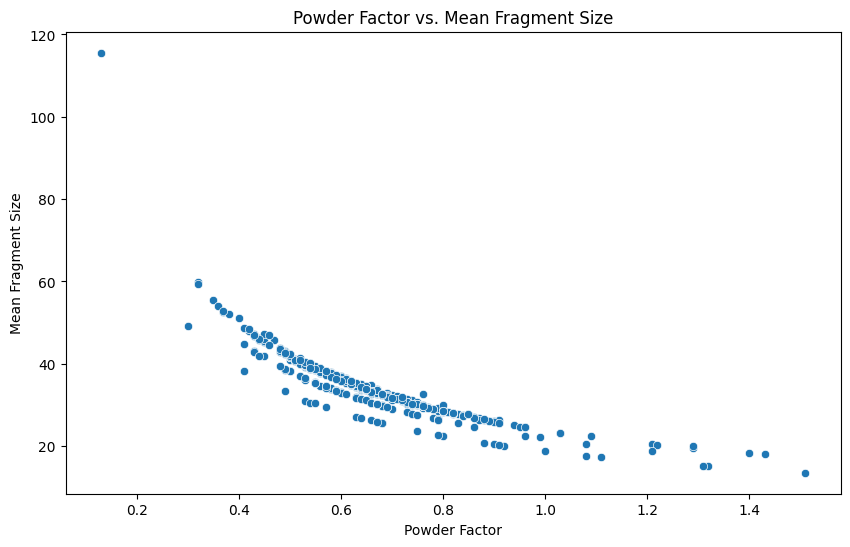

In [17]:
# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.powder_factor, y=df.mean_fragment_sizes)

# Add title and labels
plt.title('Powder Factor vs. Mean Fragment Size')
plt.xlabel('Powder Factor')
plt.ylabel('Mean Fragment Size')

# Show plot
plt.show()

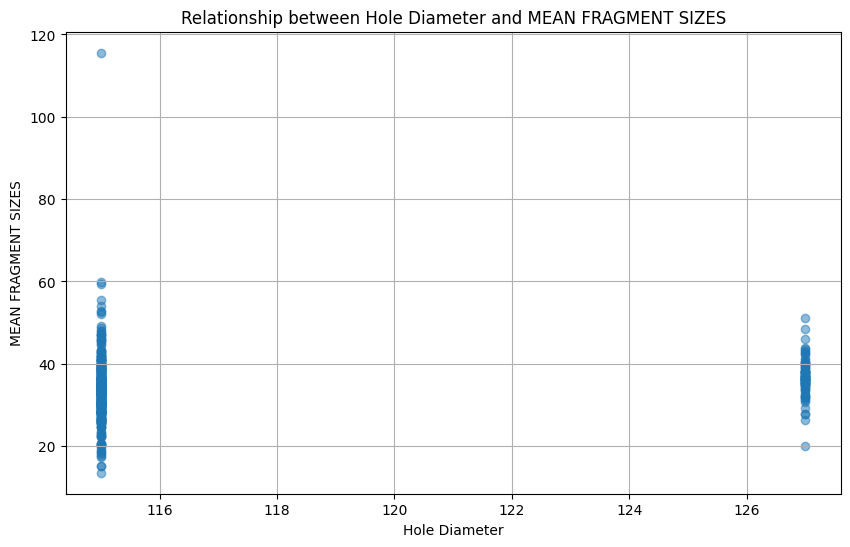

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df.hole_diameter, y=df.mean_fragment_sizes, alpha=0.5)
plt.title('Relationship between Hole Diameter and MEAN FRAGMENT SIZES')
plt.xlabel('Hole Diameter')
plt.ylabel('MEAN FRAGMENT SIZES')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
X = df.drop('mean_fragment_sizes', axis=1)
y = df.mean_fragment_sizes


In [8]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=20))
])

param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.2, random_state=20)

In [9]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_pipeline = grid_search.best_estimator_

In [10]:
# Predict on the test data
y_pred = best_pipeline.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)


print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 2.2800807007996444
R-squared: 0.9410347093338638
Root Mean Squared Error: 1.5099936095227835


In [11]:
import pickle
# Save the trained pipeline to a file

with open('best_pipeline.pkl', 'wb') as f:
    pickle.dump(best_pipeline, f)